In [17]:

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import EarlyStopping

from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
import glob
from datetime import datetime
from keras.layers import Dropout
#import pyemd
%matplotlib inline


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
import glob

all_data = pd.DataFrame()
path = 'C:\\Users\\kuruparans\\Documents\\Prof.Suganthan\\Canada_ON&QC_winddata_2017\\ON_*.xlsx'
for f in glob.glob(path):
    df = pd.read_excel(f, sheet_name=None, ignore_index=True, usecols=['windspd','month','day','hour'])
    cdf = pd.concat(df.values())
    all_data = all_data.append(cdf,ignore_index=True)
print(all_data)
dataframe=all_data

       day  hour  month  windspd
0      NaN   NaN    NaN      NaN
1      NaN   NaN    NaN      NaN
2      NaN   NaN    NaN      NaN
3      1.0   0.0    4.0     14.0
4      1.0   1.0    4.0     14.0
...    ...   ...    ...      ...
8791  30.0  19.0    9.0      2.0
8792  30.0  20.0    9.0      4.0
8793  30.0  21.0    9.0      4.0
8794  30.0  22.0    9.0      2.0
8795  30.0  23.0    9.0      1.0

[8796 rows x 4 columns]


In [4]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [5]:
dataframe['date_time']=(dataframe['month']-1)*30*24+(dataframe['day']-1) *24 + dataframe['hour']
dataframe=dataframe[['date_time','windspd'] ]
dataframe=dataframe.dropna()

In [6]:
dataframe

,date_time,windspd
3,2160.0,14.0
4,2161.0,14.0
5,2162.0,12.0
6,2163.0,10.0
7,2164.0,8.0
8,2165.0,6.0
9,2166.0,9.0
10,2167.0,12.0
11,2168.0,11.0
12,2169.0,9.0


In [7]:
''' Dividing data in test and train sets '''
dataset = dataframe.values
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

6558 2186


In [8]:
dataset

array([[2.160e+03, 1.400e+01],
       [2.161e+03, 1.400e+01],
       [2.162e+03, 1.200e+01],
       ...,
       [6.477e+03, 4.000e+00],
       [6.478e+03, 2.000e+00],
       [6.479e+03, 1.000e+00]])

In [9]:
''' Helper to create time frames with look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 1]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 1])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [10]:
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

6534
2162


In [11]:
trainY

array([ 5.,  6.,  7., ...,  4.,  9., 11.])

In [12]:
trainX

array([[14., 14., 12., ...,  7.,  7.,  6.],
       [14., 12., 10., ...,  7.,  6.,  5.],
       [12., 10.,  8., ...,  6.,  5.,  6.],
       ...,
       [24.,  8.,  1., ..., 25., 13.,  4.],
       [ 8.,  1.,  6., ..., 13.,  4.,  4.],
       [ 1.,  6.,  4., ...,  4.,  4.,  9.]])

In [13]:
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
trainX.shape



(6534, 1, 24)

Train on 6534 samples, validate on 2162 samples
Epoch 1/300
6534/6534 [==============================] - 9s 1ms/step - loss: 8.7935 - val_loss: 6.6551
Epoch 2/300
6534/6534 [==============================] - 1s 88us/step - loss: 6.6559 - val_loss: 5.6814
Epoch 3/300
6534/6534 [==============================] - 0s 76us/step - loss: 5.8063 - val_loss: 5.0415
Epoch 4/300
6534/6534 [==============================] - 0s 75us/step - loss: 5.2150 - val_loss: 4.6936
Epoch 5/300
6534/6534 [==============================] - 1s 83us/step - loss: 4.8361 - val_loss: 4.3736
Epoch 6/300
6534/6534 [==============================] - 1s 84us/step - loss: 4.5754 - val_loss: 4.1794
Epoch 7/300
6534/6534 [==============================] - 1s 78us/step - loss: 4.3503 - val_loss: 4.0348
Epoch 8/300
6534/6534 [==============================] - 1s 84us/step - loss: 4.1826 - val_loss: 3.8872
Epoch 9/300
6534/6534 [==============================] - 1s 79us/step - loss: 4.0369 - val_loss: 3.7901
Epoch 10/300
6534

6534/6534 [==============================] - 0s 69us/step - loss: 2.3471 - val_loss: 2.5004
Epoch 156/300
6534/6534 [==============================] - 0s 70us/step - loss: 2.3481 - val_loss: 2.5017
Epoch 157/300
6534/6534 [==============================] - 0s 67us/step - loss: 2.3590 - val_loss: 2.4988
Epoch 158/300
6534/6534 [==============================] - 1s 77us/step - loss: 2.3537 - val_loss: 2.4932
Epoch 159/300
6534/6534 [==============================] - 0s 72us/step - loss: 2.3504 - val_loss: 2.5022
Epoch 160/300
6534/6534 [==============================] - 0s 69us/step - loss: 2.3499 - val_loss: 2.4933
Epoch 161/300
6534/6534 [==============================] - 0s 61us/step - loss: 2.3361 - val_loss: 2.5106
Epoch 162/300
6534/6534 [==============================] - 0s 55us/step - loss: 2.3445 - val_loss: 2.4992
Epoch 163/300
6534/6534 [==============================] - 0s 61us/step - loss: 2.3447 - val_loss: 2.5046
____________________________________________________________

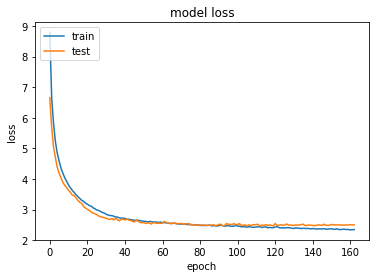

In [273]:
''' Fitting the data in LSTM Deep Learning model '''
model = Sequential()
model.add(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Root mean squared error Train: 3.337
Root mean squared error Test: 3.359


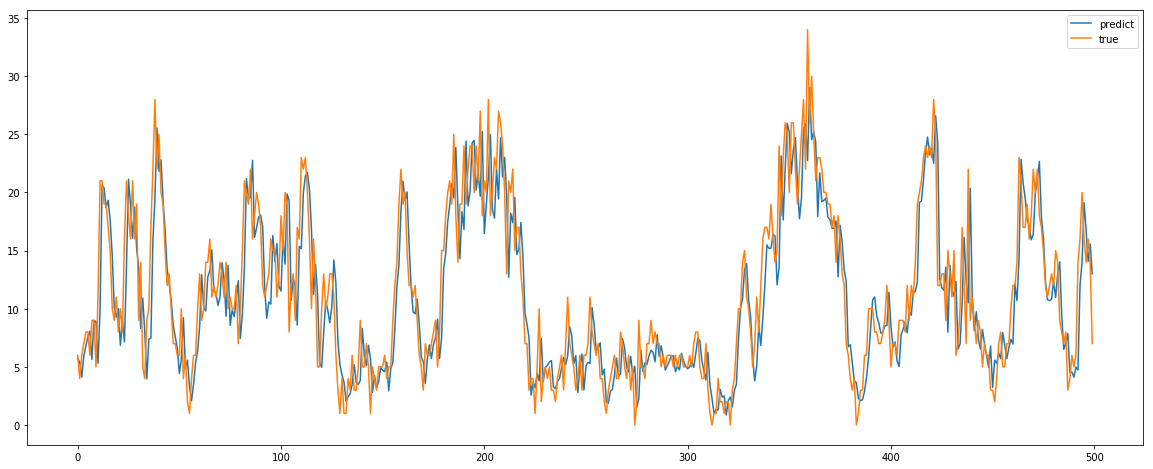

Variance : 0.785
Mean absolute error Train: 2.354
Mean absolute error Test: 2.505


In [274]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [ ]:
#changing loss funtion to RMSE 

Train on 6534 samples, validate on 2162 samples
Epoch 1/300
6534/6534 [==============================] - 9s 1ms/step - loss: 10.2464 - acc: 0.0427 - val_loss: 8.3779 - val_acc: 0.0722
Epoch 2/300
6534/6534 [==============================] - 0s 71us/step - loss: 8.4106 - acc: 0.0618 - val_loss: 7.3404 - val_acc: 0.0833
Epoch 3/300
6534/6534 [==============================] - 0s 72us/step - loss: 7.3903 - acc: 0.0738 - val_loss: 6.5882 - val_acc: 0.0856
Epoch 4/300
6534/6534 [==============================] - 1s 81us/step - loss: 6.6457 - acc: 0.0840 - val_loss: 6.0299 - val_acc: 0.0805
Epoch 5/300
6534/6534 [==============================] - 0s 76us/step - loss: 6.1041 - acc: 0.0909 - val_loss: 5.6150 - val_acc: 0.0939
Epoch 6/300
6534/6534 [==============================] - 1s 82us/step - loss: 5.7113 - acc: 0.0924 - val_loss: 5.3169 - val_acc: 0.0967
Epoch 7/300
6534/6534 [==============================] - 0s 75us/step - loss: 5.4319 - acc: 0.0938 - val_loss: 5.1120 - val_acc: 0.0953


Epoch 120/300
6534/6534 [==============================] - 0s 70us/step - loss: 3.3487 - acc: 0.1433 - val_loss: 3.3662 - val_acc: 0.1374
Epoch 121/300
6534/6534 [==============================] - 0s 65us/step - loss: 3.3476 - acc: 0.1429 - val_loss: 3.3653 - val_acc: 0.1364
Epoch 122/300
6534/6534 [==============================] - 0s 69us/step - loss: 3.3448 - acc: 0.1434 - val_loss: 3.3646 - val_acc: 0.1341
Epoch 123/300
6534/6534 [==============================] - 0s 71us/step - loss: 3.3428 - acc: 0.1413 - val_loss: 3.3709 - val_acc: 0.1383
Epoch 124/300
6534/6534 [==============================] - 0s 71us/step - loss: 3.3408 - acc: 0.1433 - val_loss: 3.3739 - val_acc: 0.1401
Epoch 125/300
6534/6534 [==============================] - 0s 71us/step - loss: 3.3392 - acc: 0.1434 - val_loss: 3.3753 - val_acc: 0.1364
Epoch 126/300
6534/6534 [==============================] - 0s 71us/step - loss: 3.3366 - acc: 0.1448 - val_loss: 3.3813 - val_acc: 0.1411
Epoch 127/300
6534/6534 [=========

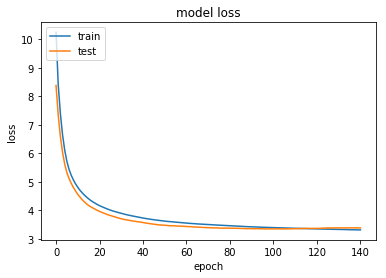

Root mean squared error Train: 3.374
Root mean squared error Test: 3.477


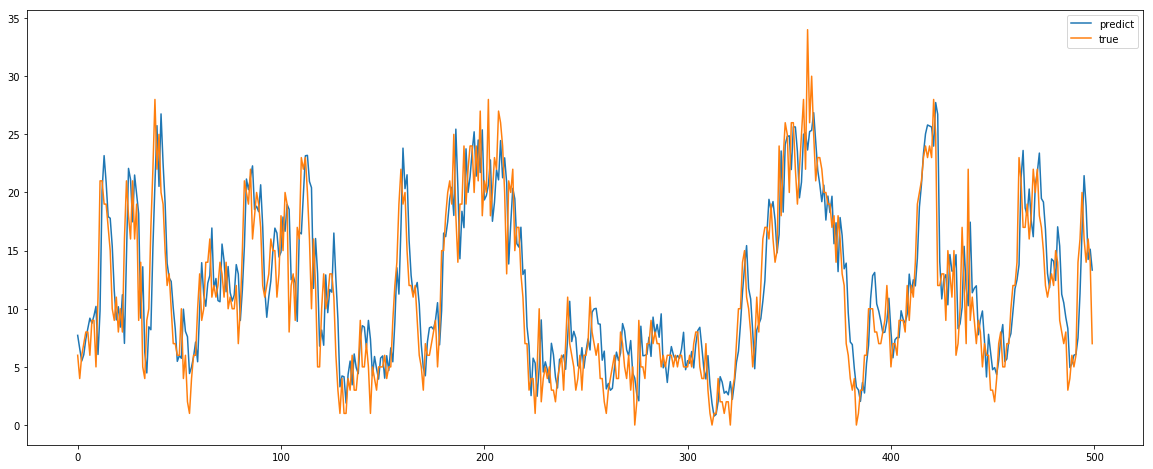

Variance : 0.770
Mean absolute error Train: 2.494
Mean absolute error Test: 2.622


In [280]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [246]:
#GRU Unit

Train on 6534 samples, validate on 2162 samples
Epoch 1/300
6534/6534 [==============================] - 8s 1ms/step - loss: 8.3560 - val_loss: 6.2990
Epoch 2/300
6534/6534 [==============================] - 0s 66us/step - loss: 6.3343 - val_loss: 5.4174
Epoch 3/300
6534/6534 [==============================] - 0s 44us/step - loss: 5.4412 - val_loss: 4.8110
Epoch 4/300
6534/6534 [==============================] - 0s 53us/step - loss: 4.9135 - val_loss: 4.4611
Epoch 5/300
6534/6534 [==============================] - 0s 60us/step - loss: 4.6000 - val_loss: 4.2545
Epoch 6/300
6534/6534 [==============================] - 0s 54us/step - loss: 4.4004 - val_loss: 4.0864
Epoch 7/300
6534/6534 [==============================] - 0s 54us/step - loss: 4.2620 - val_loss: 3.9892
Epoch 8/300
6534/6534 [==============================] - 0s 52us/step - loss: 4.1275 - val_loss: 3.8364
Epoch 9/300
6534/6534 [==============================] - 0s 44us/step - loss: 4.0065 - val_loss: 3.7324
Epoch 10/300
6534

6534/6534 [==============================] - 0s 63us/step - loss: 2.4205 - val_loss: 2.5409
Epoch 156/300
6534/6534 [==============================] - 0s 66us/step - loss: 2.4010 - val_loss: 2.5573
Epoch 157/300
6534/6534 [==============================] - 0s 65us/step - loss: 2.3954 - val_loss: 2.5385
Epoch 158/300
6534/6534 [==============================] - 0s 63us/step - loss: 2.4198 - val_loss: 2.5096
Epoch 159/300
6534/6534 [==============================] - 0s 72us/step - loss: 2.3942 - val_loss: 2.5118
Epoch 160/300
6534/6534 [==============================] - 0s 75us/step - loss: 2.4056 - val_loss: 2.5168
Epoch 161/300
6534/6534 [==============================] - 0s 64us/step - loss: 2.3974 - val_loss: 2.5394
Epoch 162/300
6534/6534 [==============================] - 0s 61us/step - loss: 2.3875 - val_loss: 2.5564
Epoch 163/300
6534/6534 [==============================] - 0s 68us/step - loss: 2.3917 - val_loss: 2.5724
Epoch 164/300
6534/6534 [==============================] - 0

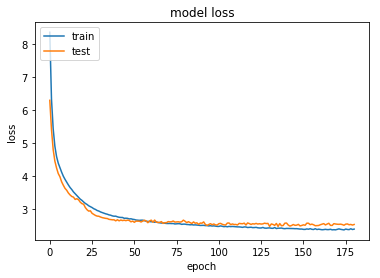

In [275]:
''' Fitting the data in LSTM Deep Learning model '''
model = Sequential()
model.add(GRU(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Root mean squared error Train: 3.466
Root mean squared error Test: 3.401


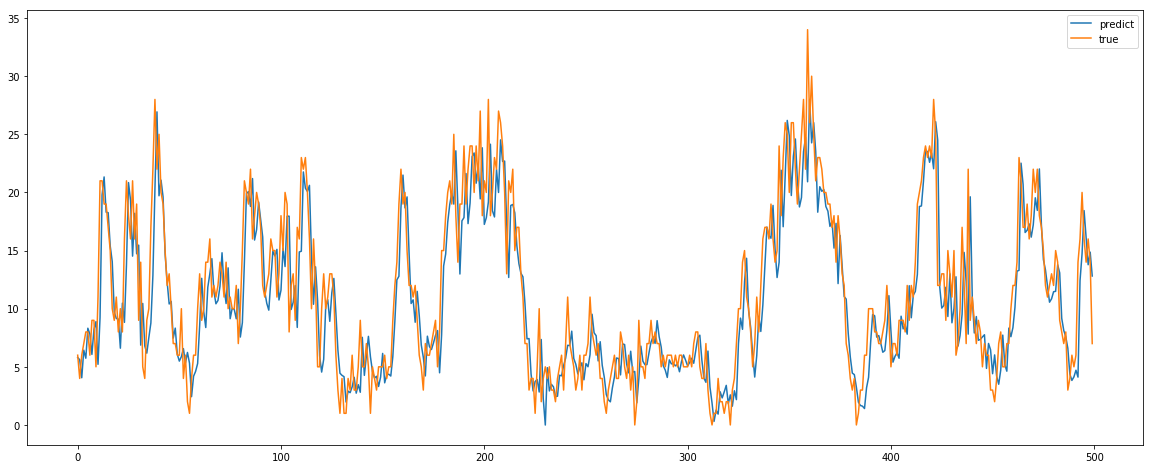

Variance : 0.780
Mean absolute error Train: 2.470
Mean absolute error Test: 2.547


In [276]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))


Train on 6534 samples, validate on 2162 samples
Epoch 1/300
6534/6534 [==============================] - 8s 1ms/step - loss: 8.7902 - acc: 0.0580 - val_loss: 6.8680 - val_acc: 0.0698
Epoch 2/300
6534/6534 [==============================] - 0s 74us/step - loss: 6.7876 - acc: 0.0762 - val_loss: 6.1051 - val_acc: 0.0648
Epoch 3/300
6534/6534 [==============================] - 0s 69us/step - loss: 6.0702 - acc: 0.0859 - val_loss: 5.5812 - val_acc: 0.0800
Epoch 4/300
6534/6534 [==============================] - 0s 73us/step - loss: 5.6030 - acc: 0.0863 - val_loss: 5.2303 - val_acc: 0.0981
Epoch 5/300
6534/6534 [==============================] - 0s 48us/step - loss: 5.3060 - acc: 0.0882 - val_loss: 5.0015 - val_acc: 0.0953
Epoch 6/300
6534/6534 [==============================] - 0s 48us/step - loss: 5.1009 - acc: 0.0852 - val_loss: 4.8349 - val_acc: 0.0990
Epoch 7/300
6534/6534 [==============================] - 0s 55us/step - loss: 4.9416 - acc: 0.0888 - val_loss: 4.6998 - val_acc: 0.1027
E

6534/6534 [==============================] - 0s 60us/step - loss: 3.3910 - acc: 0.1333 - val_loss: 3.3378 - val_acc: 0.1378
Epoch 120/300
6534/6534 [==============================] - 0s 65us/step - loss: 3.3885 - acc: 0.1333 - val_loss: 3.3388 - val_acc: 0.1351
Epoch 121/300
6534/6534 [==============================] - 0s 70us/step - loss: 3.3867 - acc: 0.1330 - val_loss: 3.3390 - val_acc: 0.1397
Epoch 122/300
6534/6534 [==============================] - 0s 68us/step - loss: 3.3849 - acc: 0.1336 - val_loss: 3.3345 - val_acc: 0.1360
Epoch 123/300
6534/6534 [==============================] - 0s 68us/step - loss: 3.3843 - acc: 0.1344 - val_loss: 3.3355 - val_acc: 0.1374
Epoch 124/300
6534/6534 [==============================] - 0s 61us/step - loss: 3.3823 - acc: 0.1344 - val_loss: 3.3376 - val_acc: 0.1369
Epoch 125/300
6534/6534 [==============================] - 0s 53us/step - loss: 3.3810 - acc: 0.1338 - val_loss: 3.3380 - val_acc: 0.1374
Epoch 126/300
6534/6534 [=======================

6534/6534 [==============================] - 0s 60us/step - loss: 3.2534 - acc: 0.1455 - val_loss: 3.3114 - val_acc: 0.1378
Epoch 238/300
6534/6534 [==============================] - 1s 81us/step - loss: 3.2540 - acc: 0.1454 - val_loss: 3.3071 - val_acc: 0.1364
Epoch 239/300
6534/6534 [==============================] - 0s 69us/step - loss: 3.2527 - acc: 0.1460 - val_loss: 3.3111 - val_acc: 0.1392
Epoch 240/300
6534/6534 [==============================] - 0s 66us/step - loss: 3.2526 - acc: 0.1452 - val_loss: 3.3065 - val_acc: 0.1351
Epoch 241/300
6534/6534 [==============================] - 0s 51us/step - loss: 3.2515 - acc: 0.1454 - val_loss: 3.3088 - val_acc: 0.1388
Epoch 242/300
6534/6534 [==============================] - 0s 61us/step - loss: 3.2505 - acc: 0.1426 - val_loss: 3.3065 - val_acc: 0.1383
Epoch 243/300
6534/6534 [==============================] - 0s 59us/step - loss: 3.2508 - acc: 0.1460 - val_loss: 3.3072 - val_acc: 0.1392
Epoch 244/300
6534/6534 [=======================

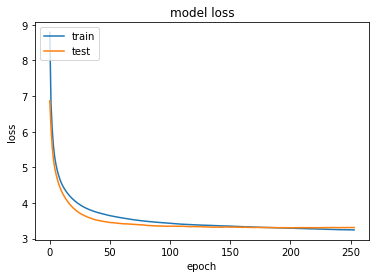

In [278]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(GRU(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Root mean squared error Train: 3.300
Root mean squared error Test: 3.402


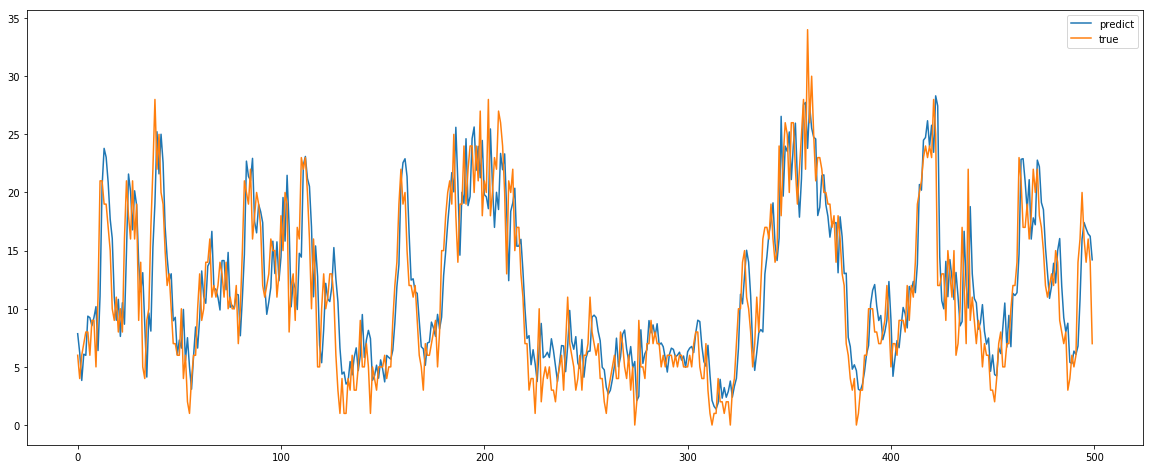

Variance : 0.780
Mean absolute error Train: 2.440
Mean absolute error Test: 2.572


In [279]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 24)                1176      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


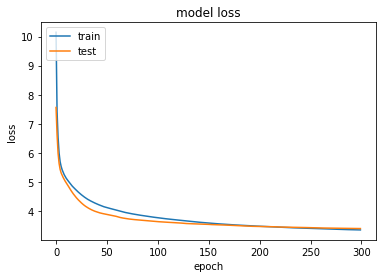

Root mean squared error Train: 3.480
Root mean squared error Test: 3.487


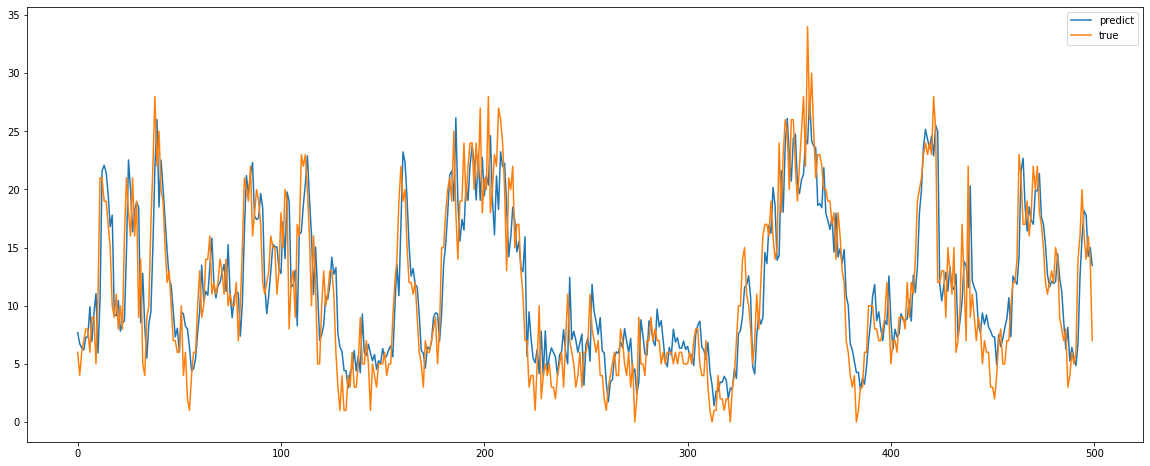

Variance : 0.768
Mean absolute error Train: 2.557
Mean absolute error Test: 2.651


In [18]:
 from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(SimpleRNN(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 24)                1176      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


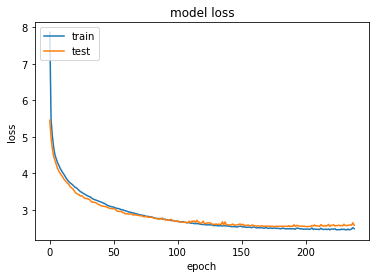

Root mean squared error Train: 3.426
Root mean squared error Test: 3.396


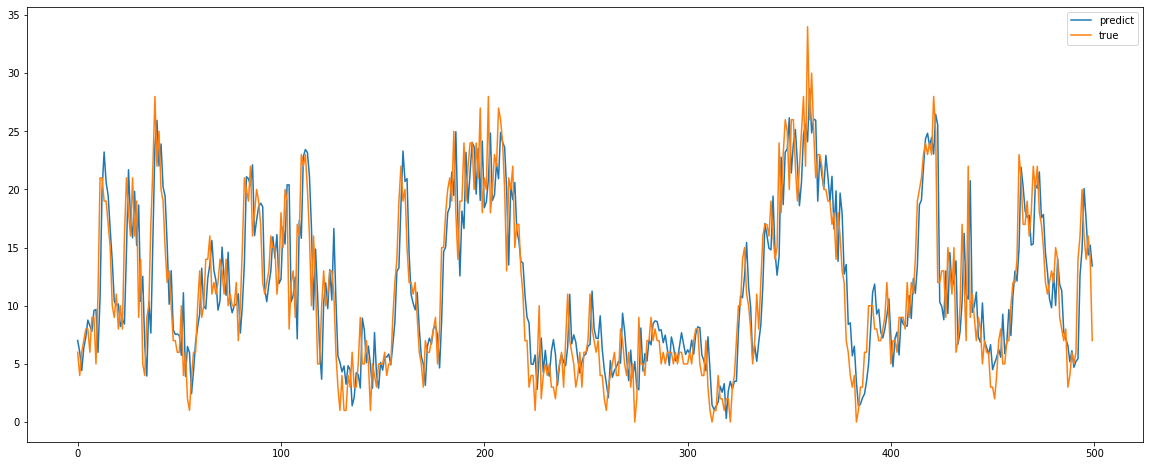

Variance : 0.780
Mean absolute error Train: 2.443
Mean absolute error Test: 2.577


In [19]:

model = Sequential()
model.add(SimpleRNN(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))